<a href="https://colab.research.google.com/github/KumaranShivam5/improved-succotash/blob/master/ML_assign2_q8_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

**LOADING DATA**

In [0]:
data=pd.read_csv("Iris.csv" ,header=0)
data = data.sample(frac=1).reset_index(drop=True)
#data_np=data.to_numpy(copy=True)
#plt.scatter(data['pt_ln'],data['pt_wd'])

In [0]:
print(data.head())
data['Species'].value_counts()


**VISUALIZATION**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'col'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


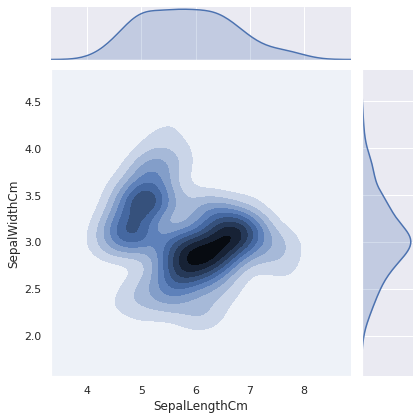

In [4]:
sb.set(color_codes=True)
sb.jointplot(data=data , x='SepalLengthCm', y='SepalWidthCm', kind='kde',col='Species')

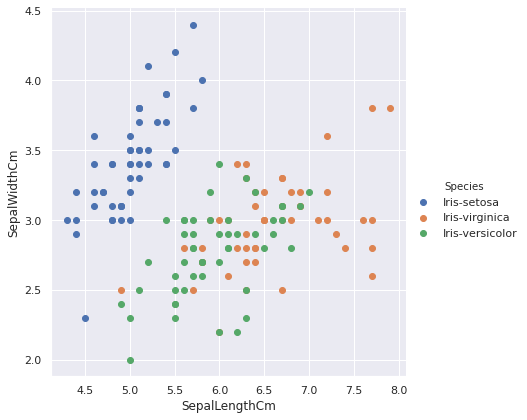

In [6]:
sb.FacetGrid(data,hue='Species',height=6)\
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm')\
    .add_legend()

**DATA DISTRIBUTION**

In [57]:
#setting up training data

split_per=0.6

split=round(len(data)*split_per)
train_data=data[0:split]
test_data=data[split+1:]
print(train_data.shape)
print(train_data['Species'].value_counts())
print(test_data['Species'].value_counts())

(90, 6)
Iris-virginica     33
Iris-setosa        30
Iris-versicolor    27
Name: Species, dtype: int64
Iris-versicolor    23
Iris-setosa        19
Iris-virginica     17
Name: Species, dtype: int64


**Function definition for finding distance id 4D space**

In [0]:
def distance (elem1,elem2):
    elem1=elem1.to_numpy()[0:4]
    elem2=elem2.to_numpy()[0:4]
    dim=len(elem1)
    dist=0
    for i in range(dim):
        dist=dist+(elem1[i]-elem2[i])**2
    dist=np.sqrt(dist)
    dist=np.divide(dist,dim)
    return(dist)

In [0]:
distance(train_data.iloc[1],test_data.iloc[1])

24.02985122717159

In [0]:
from collections import Counter as con
def predict(test_row,k):
    d=np.asarray(np.zeros(k))
    closest_index=np.asarray(np.zeros(k))
    res=[]
    for i in range(k):
        d[i]=distance(train_data.iloc[i],test_row)
        closest_index[i]=i
    ##print(d) 
    for i in range(len(train_data)):
        temp_dist=distance(train_data.iloc[i],test_row)
        #print(d)
        if(temp_dist<=d[np.argmin(d)]):
            push(d,temp_dist)
            push(closest_index,i)
    for x in (closest_index):
        res.append(train_data.iloc[int(x)].Species)
    result=con(res)
    return(result.most_common()[0][0])


#here the closest index is returned only and not the actual mode of the predicted values
#so that to keep this prediction function general for all other KNN
        

In [0]:
for x in (predict(test_data.iloc[index]),)

In [112]:
##checking accuracy
#index=24
k=4
total=len(test_data)
print("Predicted Class::", "::Original Class")
correct_ctr=0
for index in range(total):
    if(predict(test_data.iloc[index],k)==test_data.iloc[index].Species):
        correct_ctr=correct_ctr+1
acc=np.divide(np.abs(correct_ctr),total)*100
print("error",acc,"%")

Predicted Class:: ::Original Class
error 96.61016949152543 %


In [0]:
##defining push function##
def push(array,elem):
    size=len(array)-1
    for i in range(0,size):
        array[size-i]=array[size-i-1]
    array[0]=elem